In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [120]:
df=pd.read_csv("_Data Analytics  -Indian Stock Market Top 2000.csv")

In [121]:
df.head()

,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Proﬁt Margin,5Y Avg EBITDA Margin,EBITDA Margin,1Y Return vs Nifty,5Y CAGR,Debt to Equity,Long Term Debt to Equity
0,Reliance Industries Ltd,RELIANCE,Oil & Gas - Reﬁning & Marketing,1679534.21,2467.4,34.1869038,7.793277014,3.957021119,9.725370333,17.72049438,20.43380916,2.412295035,31.31618013,33.85503708,22.83121016
1,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,1358569.093,3626.7,41.89235563,37.74067975,25.93238229,19.38306507,29.0725284,28.96522046,2.801647939,23.87499408,8.948661432,7.465445194
2,HDFC Bank Ltd,HDFCBANK,Private Banks,820636.2749,1486.5,25.77925797,16.43520042,1.883433477,20.42091597,28.20611601,28.34209416,-16.83330963,15.58785742,NaN,NaN
3,Infosys Ltd,INFY,IT Services & Consulting,777500.976,1853.05,40.17885257,27.13530492,19.41789465,18.84721397,28.65680212,29.30663368,21.73084371,29.11453485,6.935219192,5.974056419
4,ICICI Bank Ltd,ICICIBANK,Private Banks,500279.0419,710.75,27.21228275,12.38289733,1.243332695,11.39501193,11.90054301,16.96355449,5.055258022,23.50698673,NaN,NaN


In [122]:
pd.isnull(df).sum()

Name                         489
Ticker                       174
Sub-Sector                   474
Market Cap                   782
Close Price                  717
PE Ratio                    1558
Return on Equity             162
Return on Assets             125
Net Proﬁt Margin             980
5Y Avg EBITDA Margin         214
EBITDA Margin                138
1Y Return vs Nifty            91
5Y CAGR                      499
Debt to Equity               256
Long Term Debt to Equity    2219
dtype: int64

In [123]:
df1=df[['Name','Sub-Sector']].copy()
df1.rename(columns={'Sub-Sector':'subsector'}, inplace=True)
df1

,Name,subsector
0,Reliance Industries Ltd,Oil & Gas - Reﬁning & Marketing
1,Tata Consultancy Services Ltd,IT Services & Consulting
2,HDFC Bank Ltd,Private Banks
3,Infosys Ltd,IT Services & Consulting
4,ICICI Bank Ltd,Private Banks
...,...,...
6002,16.01672045,0
6003,5.397272647,0
6004,22.38583333,0
6005,10.37283877,0


In [124]:
df1.dropna(axis=0, inplace= True)


In [125]:
mask = df1['subsector'].str.contains(r'[0-9]')
df1 = df1.loc[~mask]
df1

,Name,subsector
0,Reliance Industries Ltd,Oil & Gas - Reﬁning & Marketing
1,Tata Consultancy Services Ltd,IT Services & Consulting
2,HDFC Bank Ltd,Private Banks
3,Infosys Ltd,IT Services & Consulting
4,ICICI Bank Ltd,Private Banks
...,...,...
2010,Signet Industries Ltd,Plastic Products
2011,Suraj Ltd,Iron & Steel
2012,Polson Ltd,Commodity Chemicals
2013,LKP Finance Ltd,Investment Banking & Brokerage


In [126]:
p=df1.groupby('subsector').agg({"Name":"count"}).reset_index().copy()

In [127]:
p.rename(columns={'Name':'No of companies'}, inplace=True)

p

,subsector,No of companies
0,Advertising,4
1,Aerospace & Defense Equipments,7
2,Agricultural & Farm Machinery,3
3,Agro Products,21
4,Airlines,3
...,...,...
131,Trucks & Buses,4
132,Two Wheelers,4
133,Water Management,2
134,Wellness Services,2


### TASK 1: COMPANIES VS SUB-SECTOR

<AxesSubplot:xlabel='subsector'>

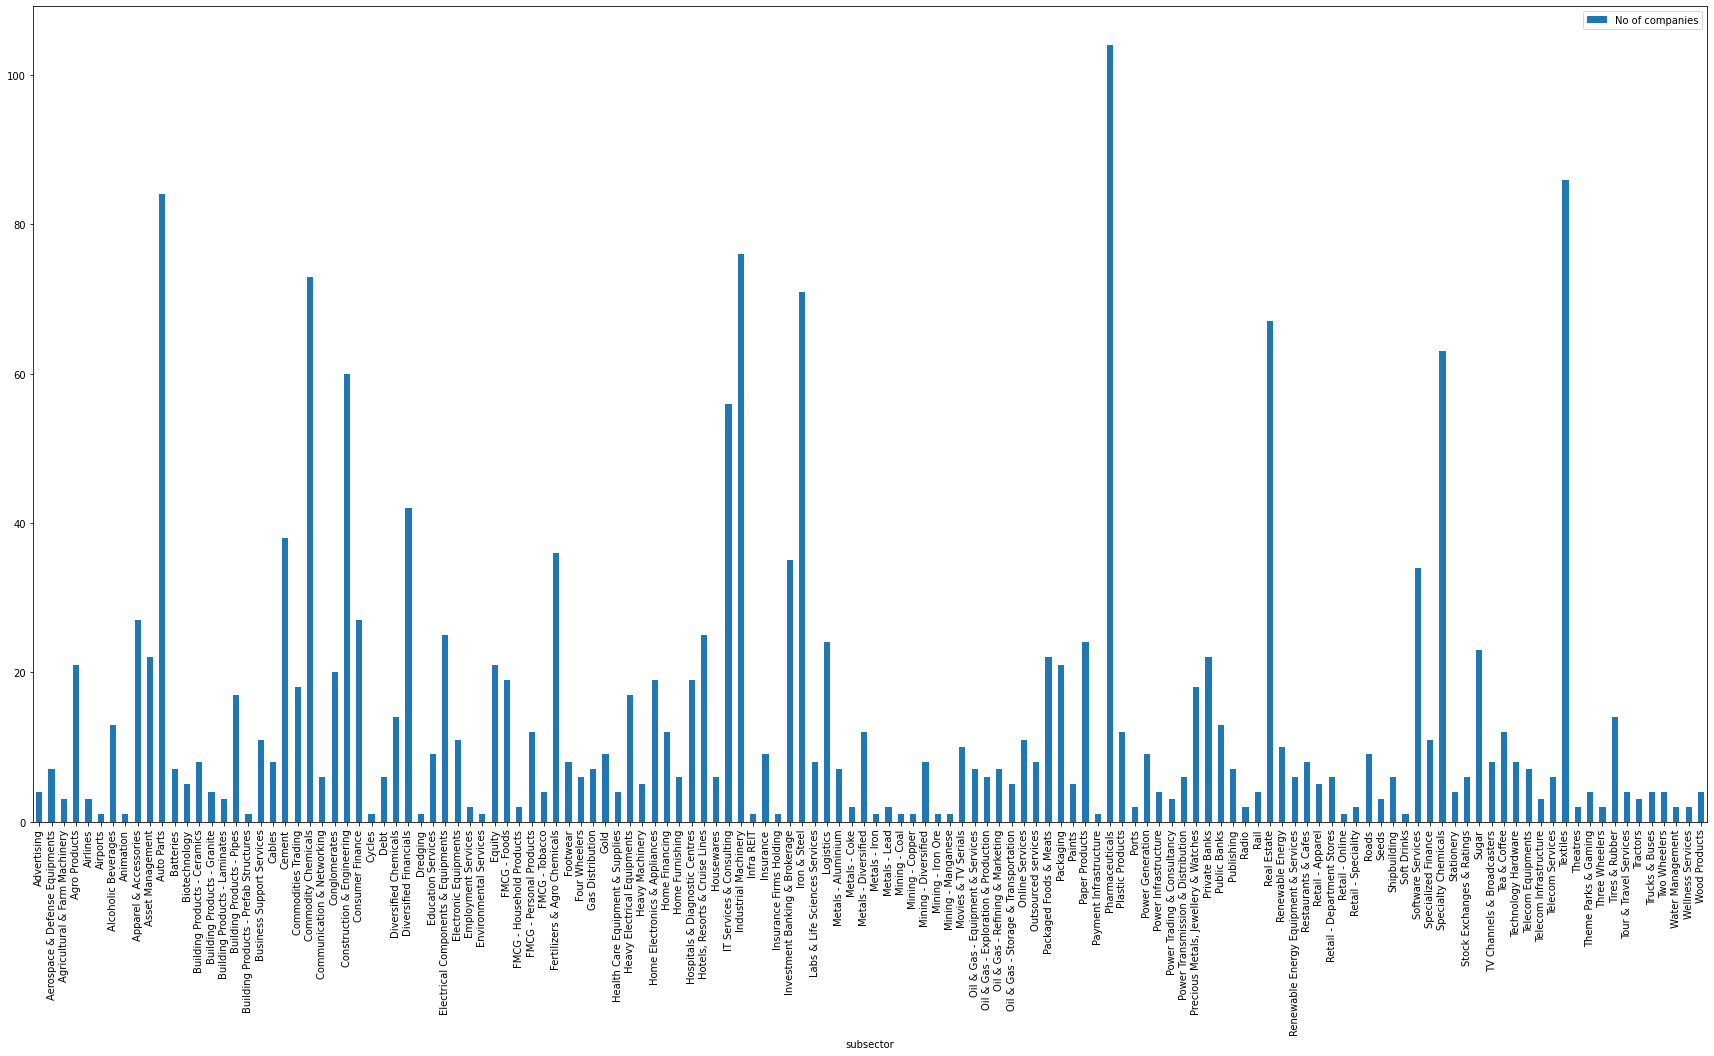

In [128]:
p.plot(x="subsector", y="No of companies", kind="bar", figsize=[30,15])

In [129]:
df['Market Cap'] = df['Market Cap'].fillna(0)

In [130]:
df2=df[['Name','Market Cap']].copy()
df2

,Name,Market Cap
0,Reliance Industries Ltd,1679534.21
1,Tata Consultancy Services Ltd,1358569.093
2,HDFC Bank Ltd,820636.2749
3,Infosys Ltd,777500.976
4,ICICI Bank Ltd,500279.0419
...,...,...
6002,16.01672045,13167
6003,5.397272647,3860
6004,22.38583333,3988
6005,10.37283877,5466


In [131]:
df2.dropna(axis=0, inplace= True)
mask1 = df2['Name'].str.contains(r'[0-9]')
df2 = df2.loc[~mask1]
df2

,Name,Market Cap
0,Reliance Industries Ltd,1679534.21
1,Tata Consultancy Services Ltd,1358569.093
2,HDFC Bank Ltd,820636.2749
3,Infosys Ltd,777500.976
4,ICICI Bank Ltd,500279.0419
...,...,...
2011,Suraj Ltd,125.5056115
2012,Polson Ltd,125.3262
2013,LKP Finance Ltd,124.9949557
2015,Net Income / Liabilities,5Y Hist Op. Cash Flow Growth


In [132]:
mask2 = df2['Market Cap'].str.contains(r'[A-Z]')
df2 = df2.loc[~mask2]
df2

,Name,Market Cap
0,Reliance Industries Ltd,1679534.21
1,Tata Consultancy Services Ltd,1358569.093
2,HDFC Bank Ltd,820636.2749
3,Infosys Ltd,777500.976
4,ICICI Bank Ltd,500279.0419
...,...,...
2009,Galaxy Bearings Ltd,125.6577
2010,Signet Industries Ltd,125.548805
2011,Suraj Ltd,125.5056115
2012,Polson Ltd,125.3262


In [133]:
df2['Market Cap']=df2['Market Cap'].astype(float)
cap=[]
for i in df2['Market Cap']:
    if i>20000:
        cap.append("Large Cap")
    elif i<=20000 and i>5000:
        cap.append("Mid Cap")
    elif i<=5000 and i>0:
        cap.append("Small Cap")
df2['Category'] = cap
df2

C:\Users\Ayush Pandey\AppData\Local\Temp\ipykernel_19704\2305483809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Market Cap']=df2['Market Cap'].astype(float)
C:\Users\Ayush Pandey\AppData\Local\Temp\ipykernel_19704\2305483809.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Category'] = cap


,Name,Market Cap,Category
0,Reliance Industries Ltd,1.679534e+06,Large Cap
1,Tata Consultancy Services Ltd,1.358569e+06,Large Cap
2,HDFC Bank Ltd,8.206363e+05,Large Cap
3,Infosys Ltd,7.775010e+05,Large Cap
4,ICICI Bank Ltd,5.002790e+05,Large Cap
...,...,...,...
2009,Galaxy Bearings Ltd,1.256577e+02,Small Cap
2010,Signet Industries Ltd,1.255488e+02,Small Cap
2011,Suraj Ltd,1.255056e+02,Small Cap
2012,Polson Ltd,1.253262e+02,Small Cap


In [134]:
catdf=df2.groupby('Category').agg({"Name":"count"}).reset_index().copy()
catdf

,Category,Name
0,Large Cap,223
1,Mid Cap,273
2,Small Cap,1471


### TASK 2: COMPANIES BASED ON MARKET CAP

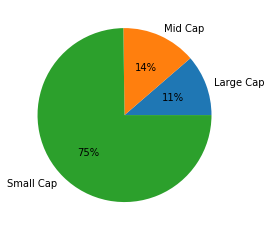

In [135]:
plt.pie(catdf["Name"], labels = catdf["Category"], autopct='%1.0f%%')
plt.show()

In [136]:
df3=df[0:10].copy()
df3=df3[["Name","Market Cap","PE Ratio","Return on Assets"]].copy()
df3

,Name,Market Cap,PE Ratio,Return on Assets
0,Reliance Industries Ltd,1679534.21,34.1869038,3.957021119
1,Tata Consultancy Services Ltd,1358569.093,41.89235563,25.93238229
2,HDFC Bank Ltd,820636.2749,25.77925797,1.883433477
3,Infosys Ltd,777500.976,40.17885257,19.41789465
4,ICICI Bank Ltd,500279.0419,27.21228275,1.243332695
5,Hindustan Unilever Ltd,493895.8312,61.77558865,17.98791806
6,State Bank of India,447926.2529,19.99184363,0.494559862
7,Housing Development Finance Corporation Ltd,437634.0433,23.35286244,2.404093509
8,Bajaj Finance Ltd,423044.1095,95.71523491,2.631487446
9,Bharti Airtel Ltd,416050.8459,-27.58317671,-4.288079574


### TASK 3: 10 COMPANIES VS 3 CASES OF GROWTH

In [137]:
df3['Good']= df3['PE Ratio'].astype(float) * 231 / df3['Return on Assets'].astype(float)
df3['Bad']= df3['PE Ratio'].astype(float) * -9 / df3['Return on Assets'].astype(float)
df3['Best']= df3['PE Ratio'].astype(float) * 351 / df3['Return on Assets'].astype(float)
df3

,Name,Market Cap,PE Ratio,Return on Assets,Good,Bad,Best
0,Reliance Industries Ltd,1679534.21,34.1869038,3.957021119,1995.737334,-77.756000,3032.484001
1,Tata Consultancy Services Ltd,1358569.093,41.89235563,25.93238229,373.167958,-14.539011,567.021443
2,HDFC Bank Ltd,820636.2749,25.77925797,1.883433477,3161.783341,-123.186364,4804.268193
3,Infosys Ltd,777500.976,40.17885257,19.41789465,477.977407,-18.622496,726.277359
4,ICICI Bank Ltd,500279.0419,27.21228275,1.243332695,5055.796683,-196.979092,7682.184570
5,Hindustan Unilever Ltd,493895.8312,61.77558865,17.98791806,793.319212,-30.908541,1205.433088
6,State Bank of India,447926.2529,19.99184363,0.494559862,9337.829924,-363.811555,14188.650664
7,Housing Development Finance Corporation Ltd,437634.0433,23.35286244,2.404093509,2243.885774,-87.424121,3409.540721
8,Bajaj Finance Ltd,423044.1095,95.71523491,2.631487446,8402.175468,-327.357486,12766.941946
9,Bharti Airtel Ltd,416050.8459,-27.58317671,-4.288079574,1485.913148,-57.892720,2257.816082


In [141]:
df4=df3[["Name","Good","Bad","Best"]].copy()
df4.set_index(['Name'], inplace = True)
df4

,Good,Bad,Best
Name,,,
Reliance Industries Ltd,1995.737334,-77.756000,3032.484001
Tata Consultancy Services Ltd,373.167958,-14.539011,567.021443
HDFC Bank Ltd,3161.783341,-123.186364,4804.268193
Infosys Ltd,477.977407,-18.622496,726.277359
ICICI Bank Ltd,5055.796683,-196.979092,7682.184570
Hindustan Unilever Ltd,793.319212,-30.908541,1205.433088
State Bank of India,9337.829924,-363.811555,14188.650664
Housing Development Finance Corporation Ltd,2243.885774,-87.424121,3409.540721
Bajaj Finance Ltd,8402.175468,-327.357486,12766.941946


<AxesSubplot:xlabel='Name'>

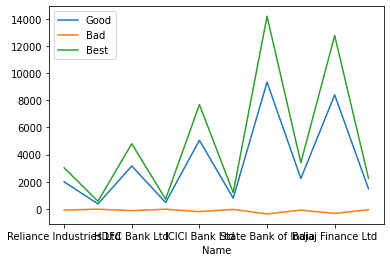

In [145]:
df4.plot()